# Cosine learning rate schedule with warmup

This learning rate schedule is similar to the one used by VISSL. It starts with a small learning rate `start_lr` (as initially the learning is very unstable) which gradually increase until its maximum `max_lr` and afterwards starts decreasing (when we have a relatively good minimum, we don't want to jump out of it) until it reaches the final learning rate `end_lr` (which is smaller than `start_lr`) following a cosine function. `start_lr` and `end_lr` are determined by arguments `div_factor` and `final_div_factor`. See [docs](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.OneCycleLR.html#torch.optim.lr_scheduler.OneCycleLR).

In [24]:
num_epochs = 10
num_batches_per_epoch = 5

In [25]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# dummy dataloader and model
dataloader = np.arange(num_batches_per_epoch)
model = torch.nn.Linear(2, 1)

optimizer = torch.optim.SGD(model.parameters(), lr=max_lr)

In [31]:
def plot_lr(title):
    plt.title("Cosine learning rate schedule with warmup")
    plt.xlabel("iterations")
    plt.ylabel("learning rate")
    plt.legend(title=title)
    plt.show()

## Impact of `div_factor`

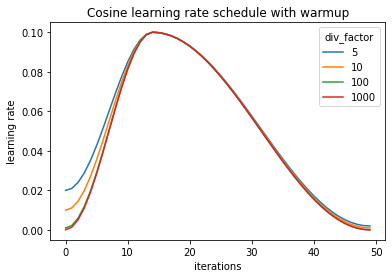

In [53]:
# initial learning rate hyperparameters
max_lr = 0.1
div_factor = 100
final_div_factor = 10
pct_start = 0.3
for div_factor in [5, 10, 100, 1000]:
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr=max_lr, 
                                                div_factor=div_factor,  # start_lr = max_lr/div_factor
                                                final_div_factor=final_div_factor, # end_lr = start_lr/final_div_factor
                                                pct_start=pct_start,
                                                steps_per_epoch=len(dataloader), 
                                                epochs=num_epochs)
    lrs = []
    for epoch in range(num_epochs):
        for batch in range(num_batches_per_epoch):
            optimizer.step()
            lrs.append(optimizer.param_groups[0]["lr"])
            scheduler.step()

    plt.plot(lrs, label=div_factor)

plot_lr("div_factor")

## Impact of `final_div_factor`

Final learning rate for final_div_factor=5: 0.0002
Final learning rate for final_div_factor=10: 0.0001
Final learning rate for final_div_factor=100: 1e-05
Final learning rate for final_div_factor=1000: 1e-06


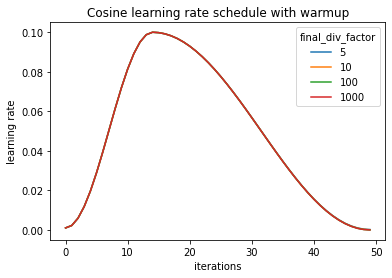

In [54]:
# initial learning rate hyperparameters
max_lr = 0.1
div_factor = 100
final_div_factor = 10
pct_start = 0.3
for final_div_factor in [5, 10, 100, 1000]:
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr=max_lr, 
                                                div_factor=div_factor,  # start_lr = max_lr/div_factor
                                                final_div_factor=final_div_factor, # end_lr = start_lr/final_div_factor
                                                pct_start=pct_start,
                                                steps_per_epoch=len(dataloader), 
                                                epochs=num_epochs)
    lrs = []
    for epoch in range(num_epochs):
        for batch in range(num_batches_per_epoch):
            optimizer.step()
            lrs.append(optimizer.param_groups[0]["lr"])
            scheduler.step()
    print(f"Final learning rate for final_div_factor={final_div_factor}: {lrs[-1]}")
    plt.plot(lrs, label=final_div_factor)
plot_lr("final_div_factor")


## Impact of `max_lr`

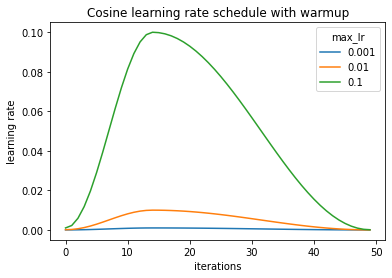

In [55]:
# initial learning rate hyperparameters
max_lr = 0.1
div_factor = 100
final_div_factor = 10
pct_start = 0.3
for max_lr in [0.001, 0.01, 0.1]:
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr=max_lr, 
                                                div_factor=div_factor,  # start_lr = max_lr/div_factor
                                                final_div_factor=final_div_factor, # end_lr = start_lr/final_div_factor
                                                pct_start=pct_start,
                                                steps_per_epoch=len(dataloader), 
                                                epochs=num_epochs)
    lrs = []
    for epoch in range(num_epochs):
        for batch in range(num_batches_per_epoch):
            optimizer.step()
            lrs.append(optimizer.param_groups[0]["lr"])
            scheduler.step()
    plt.plot(lrs, label=max_lr)
plot_lr("max_lr")

## Impact of `pct_start`

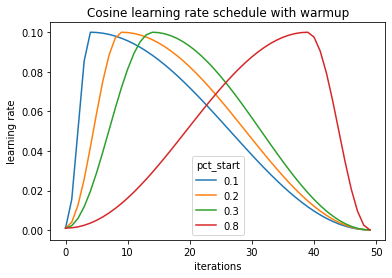

In [57]:
# initial learning rate hyperparameters
max_lr = 0.1
div_factor = 100
final_div_factor = 10
pct_start = 0.3
for pct_start in [0.1, 0.2, 0.3, 0.8]:
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr=max_lr, 
                                                div_factor=div_factor,  # start_lr = max_lr/div_factor
                                                final_div_factor=final_div_factor, # end_lr = start_lr/final_div_factor
                                                pct_start=pct_start,
                                                steps_per_epoch=len(dataloader), 
                                                epochs=num_epochs)
    lrs = []
    for epoch in range(num_epochs):
        for batch in range(num_batches_per_epoch):
            optimizer.step()
            lrs.append(optimizer.param_groups[0]["lr"])
            scheduler.step()
    plt.plot(lrs, label=pct_start)
plot_lr("pct_start")

## Comparison to VISSL learning rate schedule

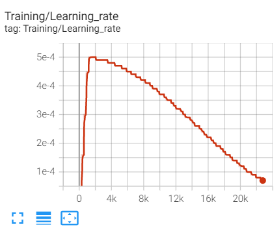

In [49]:
from IPython.display import Image
Image(filename='vissl_lr_schedule.png') 